In [1]:
import pickle as pk
import glob
from utils.utils import graph_plot
import torch
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
file='experimento_trueValues_3T1N_20rep_5pasos.pkl'
with open(file, 'rb') as f:
    exp_dict = pk.load(f)

print(exp_dict[0].keys())

dict_keys(['free_hist', 'reconfig_hist', 'max_c', 'c_config'])


In [3]:
free_hist=exp_dict[0]['free_hist']
reconfig_hist=exp_dict[0]['reconfig_hist']
max_c=exp_dict[0]['max_c']
c_config=exp_dict[0]['c_config']    


In [4]:
print(max_c[0])
print(c_config[0])

-1.7954439858733426
-1.7954443045867448


In [5]:
from cProfile import label
from matplotlib import legend


matr_diff=np.empty((len(exp_dict.keys()),len(exp_dict[0]['max_c'])))
for exp in exp_dict.keys():
    max_c=np.array(exp_dict[exp]['max_c'])
    c_config=np.array(exp_dict[exp]['c_config']    )
    
    #for i in range(len(max_c)):
    try:
        matr_diff[exp,:]=-(max_c-c_config)/max_c
    except:
        print('error')
        print(exp)
        print(max_c)
        print(c_config)
    
#plt.plot(max_c,label='max_c')
#plt.plot(c_config, label='c_config')
     

/tmp/ipykernel_30765/408790913.py:12: RuntimeWarning: overflow encountered in divide
  matr_diff[exp,:]=-(max_c-c_config)/max_c


/home/mdelcastillo/proyectos/EGNN-TopologyControl/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


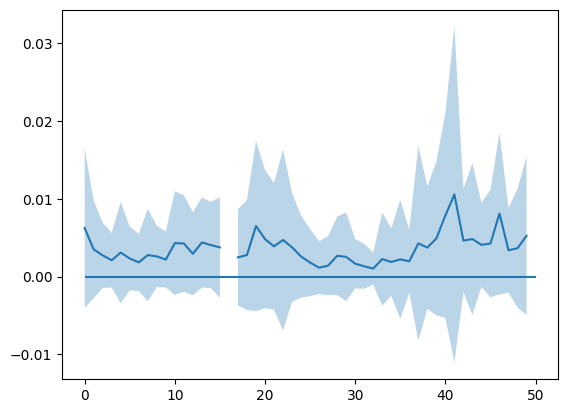

In [6]:
medias = np.mean(matr_diff, axis=0)
std = np.std(matr_diff, axis=0)
plt.plot(medias)
plt.fill_between(range(len(medias)), medias-std, medias+std, alpha=0.3)
#for i in range(matr_diff.shape[0]):
#    plt.plot(matr_diff[i,:])
plt.hlines(0,0,len(medias))